<a href="https://colab.research.google.com/github/Lahasyakr/cs666student/blob/main/Assignment1_Lahasya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

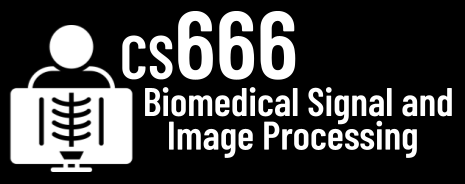

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 3.2 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [ ]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
SAMPLING_RATE = int(metadata.get('sampling_rate')) ### TODO!
SECONDS =  signal.size/SAMPLING_RATE ### TODO!
print(SECONDS)
print(SAMPLING_RATE)

15.0
1000


**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [ ]:
### TODO
from biosppy.signals import ecg
processed_signal = ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)
processed_signal['filtered']

array([86.59632358, 89.29577068, 91.89768614, ..., 92.65388691,
       89.66260537, 86.55395748])

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

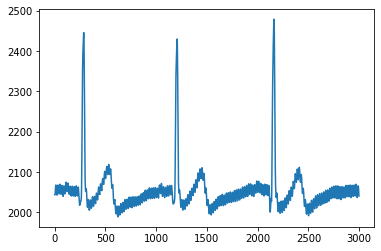

In [ ]:
### TODO plot unfiltered signal
three_second = 3
first_3_seconds = signal[0 : SAMPLING_RATE*three_second]
plt.plot(first_3_seconds)

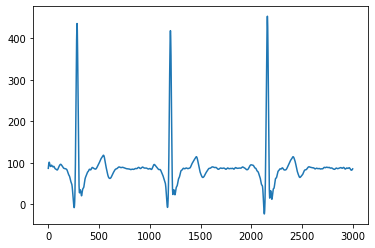

In [38]:
### TODO plot filtered signal
first_3_seconds_filtered = processed_signal['filtered'][0 : SAMPLING_RATE*three_second]
plt.plot(first_3_seconds_filtered)

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

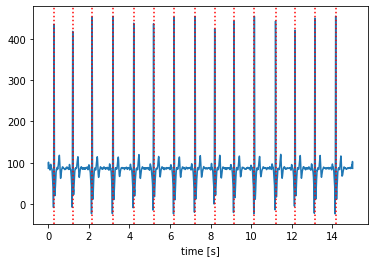

In [50]:
### TODO
time = np.arange(processed_signal['filtered'].size) / SAMPLING_RATE 


plt.plot(time,processed_signal['filtered'])
plt.xlabel('time [s]')

rpeaks = processed_signal['rpeaks']

[plt.axvline(x/SAMPLING_RATE,  color = 'r', ls=':') for x in rpeaks]
plt.show()




**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.8 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


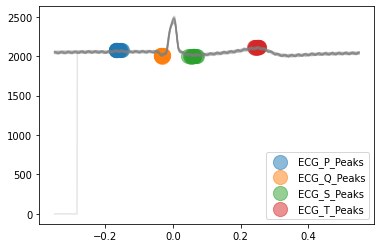

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=SAMPLING_RATE, method='peak', show=True, show_type='peaks')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


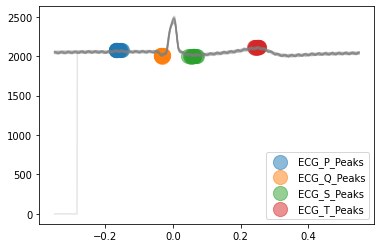

In [ ]:
# P Q S T for unfiltered signals (First 3 seconds) - Just to see 
_, waves_peak = nk.ecg_delineate(signal, rpeaks[0:SAMPLING_RATE*three_second], sampling_rate=SAMPLING_RATE, method='peak', show=True, show_type='peaks')

In [ ]:
# TODO Does the detection work well?
print('Yes')

Yes


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


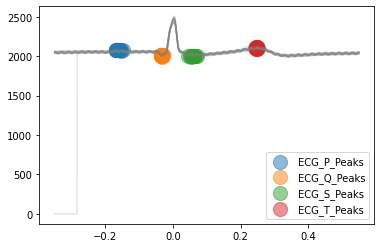

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
_, waves_peak=nk.ecg_delineate(signal, rpeaks, SAMPLING_RATE, show=True, show_type='peaks')

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


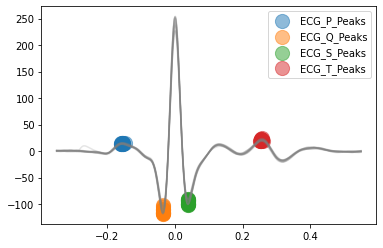

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
nk_filtered_signal = nk.signal_filter(signal, SAMPLING_RATE, lowcut=5, highcut=20, method='butterworth', order=2)
nk_filtered_signal
#plt.plot(nk_filter_signal)
_, waves_peak = nk.ecg_delineate(nk_filtered_signal, rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


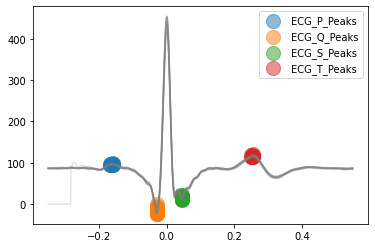

In [52]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak = nk.ecg_delineate(processed_signal['filtered'], rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [53]:
# TODO Which one works the best?
print('Biosppy filtered signal is much better')

Biosppy filtered signal is much better


In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#